# Machine Learning Tools
[Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

[Model Selection](https://scikit-learn.org/stable/model_selection.html#model-selection)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [3]:
# StandardScaler use the mean and variance to scale data 
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

In [4]:
# MinMaxScaler scale based on the entire data range (takes outliers into account)
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit_transform(X)
X_minmax

array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

In [5]:
# Normalizer transform data row wise from 0 to 1 
from sklearn.preprocessing import Normalizer
X_norm = Normalizer().fit_transform(X)
X_norm

array([[0.        , 1.        ],
       [0.5547002 , 0.83205029],
       [0.62469505, 0.78086881]])

In [6]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(2).fit_transform(X)
X_poly

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [7]:
# Custom tranformation
from sklearn.preprocessing import FunctionTransformer
X_trans = FunctionTransformer(np.log1p, validate=True).fit_transform(X)
X_trans 

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436],
       [1.60943791, 1.79175947]])

In [ ]:
# Custom transformer
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class DenseTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        #Learn how to transform data based on input data, X.
        return self

    def transform(self, X, **fit_params):
        #Transform X into a new dataset, Xprime and return it.
        return X.todense()

## Split data into Train and Test sets

In [8]:
X = np.arange(200).reshape(100, 2)
y = np.arange(100)

from sklearn.model_selection import train_test_split

# Get randomized Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test[:5]

array([[ 52,  53],
       [172, 173],
       [  4,   5],
       [110, 111],
       [150, 151]])

## Cross Validation

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')

X = iris.drop('species',axis=1)
y = iris['species']

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from statistics import mean

model = LogisticRegression(solver="liblinear", multi_class="auto")
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
mean(scores)

0.96

In [15]:
from sklearn.model_selection import cross_validate

cv = cross_validate(model, X, y, scoring=['accuracy'], cv=5)
pd.DataFrame(cv)

,fit_time,score_time,test_accuracy
0,0.007999,0.006999,1.000000
1,0.008004,0.006996,0.966667
2,0.010000,0.006000,0.933333
3,0.012001,0.005998,0.900000
4,0.012001,0.004000,1.000000


## Hyperparameter Tuning (Grid Search) with Pipeline

In [16]:
# estimator.get_params()
# where estimator is a model like sklearn.svm.SVC()

In [17]:
# Selected Parameters Grid
param_grid = [{
  'C': [1, 10, 100, 1000], 
  'gamma': [0.001, 0.0001], 
  'kernel': ['rbf']
}]

In [18]:
# Random Grid
import scipy
rand_grid = [{
    'C': scipy.stats.expon(scale=100), 
    'gamma': scipy.stats.expon(scale=.1),
    'kernel': ['rbf'], 
    'class_weight':['balanced', None]
}]

### Example

In [19]:
import seaborn as sns
iris = sns.load_dataset('iris')

X = iris.drop('species',axis=1)
y = iris['species']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.50)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe = Pipeline([
    ('svc', SVC())
])

param_grid = [{
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}]

#grid = GridSearchCV(model, param_grid, refit=True, verbose=1) # where model = SVC()
grid = GridSearchCV(pipe, param_grid, cv=6, refit=True, verbose=1)
grid.fit(X_train, y_train)
grid.best_estimator_ # or grid.best_params_

Fitting 6 folds for each of 16 candidates, totalling 96 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    1.0s finished


Pipeline(steps=[('svc', SVC(C=10, gamma=0.1))])

In [24]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
9,0.004332,0.001104,0.003334,0.000945,10,0.10,"{'svc__C': 10, 'svc__gamma': 0.1}",1.0,1.0,1.000000,1.000000,0.941176,1.000000,0.990196,0.021922,1
14,0.004835,0.001214,0.003165,0.000899,100,0.01,"{'svc__C': 100, 'svc__gamma': 0.01}",1.0,1.0,1.000000,1.000000,0.941176,1.000000,0.990196,0.021922,1
4,0.006166,0.000899,0.004833,0.001462,1,1,"{'svc__C': 1, 'svc__gamma': 1}",1.0,1.0,1.000000,1.000000,0.941176,0.941176,0.980392,0.027730,3
13,0.005336,0.000942,0.003831,0.000898,100,0.10,"{'svc__C': 100, 'svc__gamma': 0.1}",1.0,1.0,1.000000,0.941176,0.941176,1.000000,0.980392,0.027730,3
5,0.005834,0.000685,0.003831,0.000691,1,0.10,"{'svc__C': 1, 'svc__gamma': 0.1}",1.0,1.0,0.944444,1.000000,0.941176,0.941176,0.971133,0.028888,5


In [25]:
# use the best params by default
grid_predictions = grid.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 9  0  0]
 [ 0 16  2]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.94      0.89      0.91        18
   virginica       0.89      0.94      0.92        18

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



## Evaluating multiple models

In [26]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# create the dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
	X, y = get_dataset()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()

# evaluate each model
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)


>LogisticRegression: ideal=0.840, cv=0.810
>RidgeClassifier: ideal=0.830, cv=0.810
>SGDClassifier: ideal=0.820, cv=0.710
>PassiveAggressiveClassifier: ideal=0.810, cv=0.740
>KNeighborsClassifier: ideal=0.760, cv=0.740
>DecisionTreeClassifier: ideal=0.730, cv=0.670
>ExtraTreeClassifier: ideal=0.680, cv=0.530
>LinearSVC: ideal=0.820, cv=0.800
>SVC: ideal=0.900, cv=0.840
>GaussianNB: ideal=0.730, cv=0.720
>AdaBoostClassifier: ideal=0.740, cv=0.680
>BaggingClassifier: ideal=0.760, cv=0.720
>RandomForestClassifier: ideal=0.780, cv=0.750
>ExtraTreesClassifier: ideal=0.780, cv=0.790
>GaussianProcessClassifier: ideal=0.790, cv=0.720
>GradientBoostingClassifier: ideal=0.820, cv=0.740
>LinearDiscriminantAnalysis: ideal=0.830, cv=0.810
>QuadraticDiscriminantAnalysis: ideal=0.820, cv=0.680
Correlation: 0.797


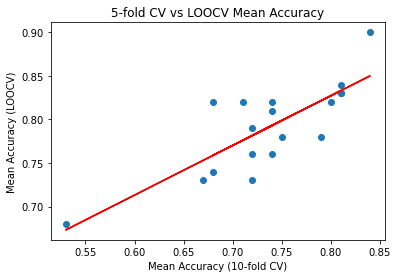

In [27]:
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('5-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()